## Project: Sales Superstore A-to-Z-Market Exploratory Data Analysis with Python 


#### Emilien Chollet
#### Polina Haan-Shabarova

In [2]:
import pandas as pd

In [62]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb

# Cleaning the data

In [4]:
df=pd.read_csv('sales.csv')

Lest's take a look at the content of the dataframe.

In [4]:
df.head(10)

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Order Year     9994 non-null   int64  
 3   Order Quarter  9994 non-null   int64  
 4   Ship Date      9994 non-null   object 
 5   Ship Mode      9994 non-null   object 
 6   Customer ID    9994 non-null   object 
 7   Customer Name  9994 non-null   object 
 8   Segment        9994 non-null   object 
 9   Country        9994 non-null   object 
 10  City           9994 non-null   object 
 11  State          9994 non-null   object 
 12  Postal Code    9983 non-null   float64
 13  Region         9994 non-null   object 
 14  Product ID     9994 non-null   object 
 15  Category       9994 non-null   object 
 16  Sub-Category   9994 non-null   object 
 17  Product Name   9994 non-null   object 
 18  Sales   

Dataframe has 21 variables and 9994 rows.

There are no missing values. Nevertheless, the variables Ship date and Order date are dates and not strings. We need to change the data type:

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Order Year     9994 non-null   int64         
 3   Order Quarter  9994 non-null   int64         
 4   Ship Date      9994 non-null   datetime64[ns]
 5   Ship Mode      9994 non-null   object        
 6   Customer ID    9994 non-null   object        
 7   Customer Name  9994 non-null   object        
 8   Segment        9994 non-null   object        
 9   Country        9994 non-null   object        
 10  City           9994 non-null   object        
 11  State          9994 non-null   object        
 12  Postal Code    9983 non-null   float64       
 13  Region         9994 non-null   object        
 14  Product ID     9994 non-null   object        
 15  Category       9994 n

Before starting our analysis we need to understand what each row and column represent. 

One row represents 1 product by order by customer. This information is important if later we want to analyse cunsumer behaviour by grouping rows (group by Order_ID, than by Customer_ID).  

# Data enrichement

There are 2 columns built using formulars that we need to understand. 

###### Sales = Price * Quantity

###### Profit = Sales - Expenses

We need to create new variables  : 

###### Profit ratio = Profit/Sales : this variable will help us to judge the ability of the business to manufacture goods cost-effectively and to set reasonalbe price points.

###### Price = Sales/Quantity : this variable will give us an idea about the price distribution and market segment. 

### Adding columns

In [6]:
df['Price']=df.Sales/df.Quantity

In [7]:
df['Profit ratio_single sale']=df.Profit/df.Sales

In [8]:
df.head()

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price,Profit ratio_single sale
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,0.1600
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,0.3000
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,0.4700
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,-0.4000
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,0.1125


# Analyse the profit of different products 

### Profit ratio distribution analysis

To start our profit analysis, we want to know the global profit ratio and the profit ratio distribution.

In [7]:
Global_profit_ratio = sum(df['Profit'])/sum(df['Sales'])
print(Global_profit_ratio)

0.12467217240315906


The global profit ratio is equal to 12%, it is a good profit margin. 

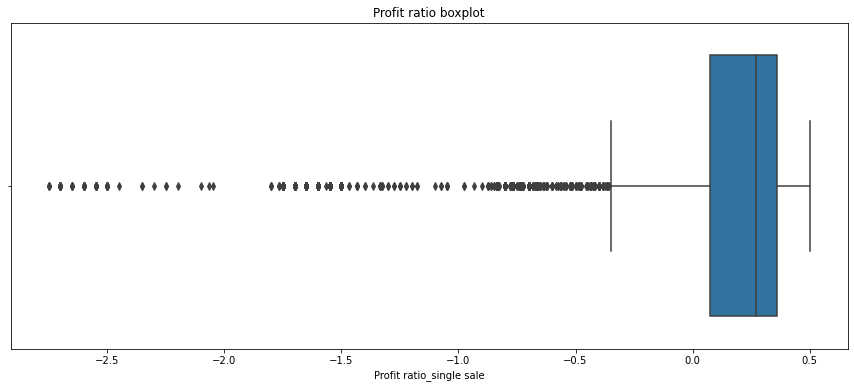

In [8]:
plt.figure( figsize=(15,6))
chart=sb.boxplot(x=df['Profit ratio_single sale'])
chart.set_title('Profit ratio boxplot')
plt.show()

We can also build a Histogram.

C:\Users\HAAN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


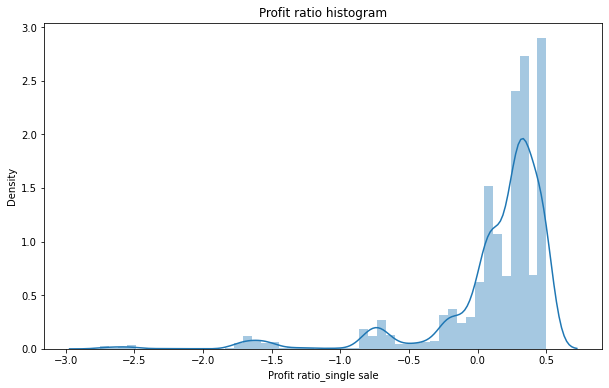

In [16]:
plt.figure( figsize=(10,6))
chart=sb.distplot(df['Profit ratio_single sale'], hist=True)
chart.set_title('Profit ratio histogram')
plt.show()

As we can see, the majority of the products have positive profit ratio between 0 and 0.5. However, some products have negative profit ratio, it can be the result of different factors : high expenses, low price, high discount, low sales.

On one hand, our objective is to maintain and consolidate the current strategy for all products with high profit ratio. On the other hand, we need to identify the products with negative profit ratio and find the reasons why they are less profitable. According to the result of our analysis we will decide to change or not the strategy for these products or not. 

### Analysis of categories

In [10]:
profit_ratio_by_category=df.groupby(['Category']).agg(Total_profit=('Profit','sum'),Total_sales=('Sales','sum')).reset_index()
profit_ratio_by_category['Profit_ratio']=profit_ratio_by_category['Total_profit']/profit_ratio_by_category['Total_sales']
print(profit_ratio_by_category)

          Category  Total_profit  Total_sales  Profit_ratio
0        Furniture    18451.2728  741999.7953      0.024867
1  Office Supplies   122490.8008  719047.0320      0.170352
2       Technology   145454.9481  836154.0330      0.173957


<AxesSubplot:xlabel='Category', ylabel='Profit_ratio'>

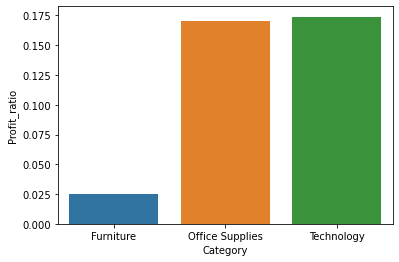

In [11]:
sb.barplot(data=profit_ratio_by_category,x='Category',y='Profit_ratio',ci=None)

Furniture is much less profitable than Office supplies and Technology.
Now we want to increase the granularity of the plot to analyse the profitability of each sub-category. 

### Analysis of sub-categories

#### Profit ratio analysis

In [8]:
profit_ratio_by_sub_category=df.groupby(['Sub-Category','Category']).agg(Total_profit=('Profit','sum'),Total_sales=('Sales','sum')).reset_index()
profit_ratio_by_sub_category['Profit_ratio']=profit_ratio_by_sub_category['Total_profit']/profit_ratio_by_sub_category['Total_sales']
profit_ratio_by_sub_category=profit_ratio_by_sub_category.sort_values(by='Profit_ratio',ascending=False).reset_index(drop=True)
print(profit_ratio_by_sub_category)

   Sub-Category         Category  Total_profit  Total_sales  Profit_ratio
0        Labels  Office Supplies     5546.2540   12486.3120      0.444187
1         Paper  Office Supplies    34053.5693   78479.2060      0.433918
2     Envelopes  Office Supplies     6964.1767   16476.4020      0.422676
3       Copiers       Technology    55617.8249  149528.0300      0.371956
4     Fasteners  Office Supplies      949.5182    3024.2800      0.313965
5   Accessories       Technology    41936.6357  167380.3180      0.250547
6           Art  Office Supplies     6527.7870   27118.7920      0.240711
7    Appliances  Office Supplies    18138.0054  107532.1610      0.168675
8       Binders  Office Supplies    30221.7633  203412.7330      0.148574
9   Furnishings        Furniture    13059.1436   91705.1640      0.142404
10       Phones       Technology    44515.7306  330007.0540      0.134893
11      Storage  Office Supplies    21278.8264  223843.6080      0.095061
12       Chairs        Furniture    26

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit_ratio'>

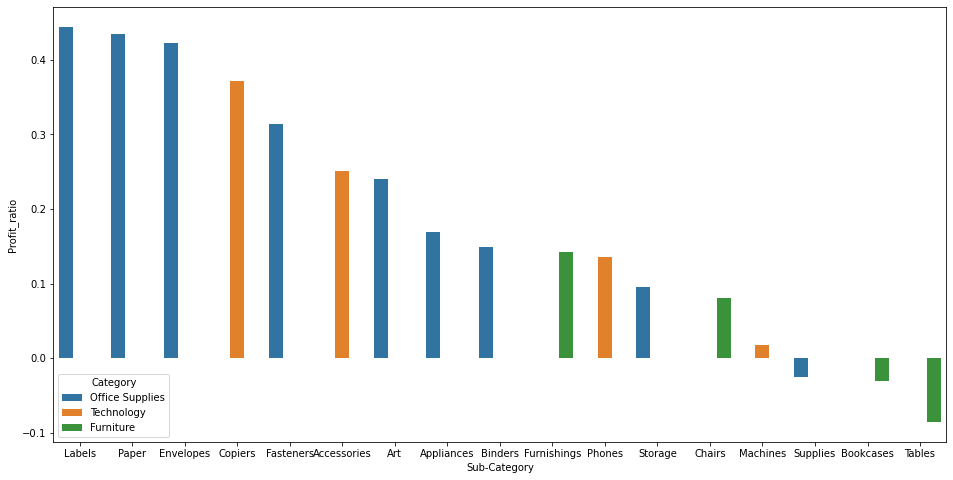

In [32]:
plt.figure( figsize=(16,8))
sb.barplot(data=profit_ratio_by_sub_category,x='Sub-Category',y='Profit_ratio', hue='Category',ci=None)

The less profitable sub-categories are Tables and Bookcases. The most profitable are Labels, Paper, Evelopes.

Let's compare the average price of all these sub-categories. 

#### Price analysis

In [7]:
sub_categories_comparison = df.groupby('Sub-Category').agg(mean_price=('Price', 'mean'), avg_discount=('Discount','mean')).reset_index()
sub_categories_comparison = sub_categories_comparison.sort_values(by='mean_price').reset_index(drop=True)
sub_categories_comparison

def highlight(df):
    if df['Sub-Category'] in ['Labels','Paper','Envelopes','Copiers','Fasteners']:
        return ['background-color: green']*len(df)
    elif df['Sub-Category'] in ['Tables','Machines','Bookcases','Chairs','Supplies']:
        return ['background-color: red']*len(df)
    else:
        return ['background-color: white']*len(df)

sub_categories_comparison.style.apply(highlight, axis=1)

,Sub-Category,mean_price,avg_discount
0,Fasteners,3.288756,0.082028
1,Labels,8.320423,0.068681
2,Art,8.818075,0.074874
3,Paper,15.578958,0.074891
4,Envelopes,18.874843,0.080315
5,Furnishings,25.607413,0.138349
6,Binders,36.672279,0.372292
7,Accessories,55.356630,0.078452
8,Appliances,60.618659,0.166524
9,Supplies,69.308105,0.076842


Let's take a look at top 5 profitable products. Labels, Paper, Envelops and Fasteners are cheap products. Copier is the most expensive product. 
Let's take a look at 5 less profitable products. Tables, Machines, Bookcases and Chairs can be considered as more expensive products. 

We can conclude that the most profitable products are cheap products which don't require a lot of materials and complexe texhnologies to be produced. The less profitable products are more complex, they require more materials, technologies and labour force to be manufactured but even though their price is higher it seems to be insufficient to cover all the costs. The only exception are Copiers.

We can also see that the higher is the price, the higher is the discount.

Now let's take a look at the popularity of each type of products. 

#### Popularity analysis

In [24]:
sub_categories_popularity = df.groupby('Sub-Category').agg(count_orders=('Product ID', 'count'), mean_quantity=('Quantity','mean')).reset_index()
sub_categories_popularity = sub_categories_popularity.sort_values(by='count_orders',ascending=False).reset_index(drop=True)
sub_categories_popularity

,Sub-Category,count_orders,mean_quantity
0,Binders,1523,3.922521
1,Paper,1370,3.779562
2,Furnishings,957,3.723093
3,Phones,889,3.699663
4,Storage,846,3.732861
5,Art,796,3.768844
6,Accessories,775,3.840000
7,Chairs,617,3.818476
8,Appliances,466,3.710300
9,Labels,364,3.846154


In average people buy 3 products by order. We can see that the most popular products are profitable (Profit ratio between 10% and 20%) and have a median average price. In general, expensive products are less popular.

Let's see how much profit brings each category. 

#### Profit analysis

In [25]:
sub_categories_profit = df.groupby('Sub-Category').agg(sum_profit=('Profit','sum')).reset_index()
sub_categories_profit = sub_categories_profit.sort_values(by='sum_profit',ascending=False).reset_index(drop=True)
sub_categories_profit

,Sub-Category,sum_profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


Let's analyse the 3 previous tables.

Copiers : the most expensive and the less popular product, but its is very profitable and brings the most money to the company. This sub-category is very important for the business, the company has already a good commercial strategy for this sub-category but it can be improved by increasing sales.

Phones : popular product with high price and good profitability. This sub-category is performing well.

Accessories : popular product with median price and high profitability. This sub-category is performing well.

Paper : very popular and cheap product with very high profitability. This sub-category is performing well, but in avarage people buy 3 products by order. Because paper is very cheap and popular product, the company can easily increase the average number of units by order. For example, the company can propose 2+1 and 5+2 discount.

Binders : the most popular product with median price and profitability. One of the reasons of it's popularity can be a high discount.This sub-category is performing well.

Chairs: it is not the most profitable category but because the price is high and the the number of orders is relativly high this sub-category brings a lot of money. 

Storage : popular product with relativly high price and very small discount. This sub-category doesn't have the best profitability but it brings money to the business. The sub-strategy performance is good.

Furnishings : the most profitable product in category "Furniture". It is popular and relativly cheap. The strategy can be improved by increasing the number of products by order.

Envelops/Labels : very profitable products with low price. However, they are not very popular. Company should increase the number of orders in these sub-categories.

Machines : expensive products with low profitability and popularity. This product don't bring a lot of money to the company. This sub-categoty is not performing well.

Fasteners : the cheapest product with high profitability but low popularity. If the company will not sell machines anymore, fasteners should not be sold neither.

Supplies : the sub-category is not profitable, it has a median price and low popularity. The sub-categoty is not performing well.

Bookcases : the sub-category is not profitable and not very popular. It's price is already high. The sub-category is not performing well.

Tables : the sub-category is not profitable and expensive. The sub-category is not performing well.

#### Discount analysis

Let's analyse discount sensibility of buyers in each sub-category.
We will create a new column "Discount_2":
   - if the discount = 0 --> "No"
   - if the discount > 0 --> "Yes".

In [11]:
myfunction=lambda x: "Yes" if x>0 else "No"

In [14]:
df['Discount_2']=df.Discount.apply(myfunction)
df.head(10)

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price,Profit ratio_single sale,Discount_2
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,0.1600,No
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,0.3000,No
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,0.4700,No
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,-0.4000,Yes
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,0.1125,Yes
5,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,6.9800,0.2900,No
6,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,1.8200,0.2700,No
7,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,151.1920,0.1000,Yes
8,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,6.1680,0.3125,Yes
9,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,22.9800,0.3000,No


Now we can count the number of units sold in each sub-category with and withount discount.

In [31]:
discount_table = df.groupby(["Discount_2","Sub-Category"]).agg(sum_products_sold=('Quantity','sum')).reset_index()
discount_table_pivot=discount_table.pivot(columns='Discount_2',
                                          index='Sub-Category',
                                          values='sum_products_sold'
                                          )
discount_table_pivot['% No']= discount_table_pivot.No/(discount_table_pivot.No+discount_table_pivot.Yes)*100
discount_table_pivot['% Yes']= discount_table_pivot.Yes/(discount_table_pivot.No+discount_table_pivot.Yes)*100
discount_table_pivot

Discount_2,No,Yes,% No,% Yes
Sub-Category,,,,
Accessories,1835,1141,61.659946,38.340054
Appliances,1021,708,59.051475,40.948525
Art,1904,1096,63.466667,36.533333
Binders,1291,4683,21.610311,78.389689
Bookcases,211,657,24.308756,75.691244
Chairs,540,1816,22.920204,77.079796
Copiers,82,152,35.042735,64.957265
Envelopes,548,358,60.485651,39.514349
Fasteners,504,410,55.142232,44.857768


Discount sensible sub-categories are Binders, Bookcases, Chairs, Copiers, Tables.
We made a hypothesis that the popularity of Binders is due to the discount, it is true. The company should keep the same commercial stategy for this sub-category because the high discount increases the sales and brings profit.

We saw that the profitability and the popularity of Bookcases was low. To increase the profitability the company needs to increase price (but it is already high) or dicrease the discount (but most of the buyers seem to be motivated by the high discount which is around 20%).

Most of the sales of copiers are motivated by the discount. This sub-categoty is already very profitable but not enough popular. The average discount is 16%, the company can increase the discount even more to motivate people to buy more copiers. The products will remain profitable and bring more money to the company.

We said that chairs are expensive products and have relativly high discount (17%), we can see that most of the sales are motivated by the discount. This category is very important for the company because it brings a lot of money. To get even more money the company needs to increase the profitability the sub-category by decreasing costs.

Tables is the most unprofitable category. Products are expensive and most of the sales are motivated by a high discount (27%). 

Supplies' and Fasteners' sales seem to be less motivated by the discount. The compagny should decrease the discount for these sub-categories, this measure will increase the profitability but not impact the popularity of the products.

We suggested to increase the sales of Envelops and Labels. Here we can see that their sales are not very motivated by the discount which is very low (<10%). The company can try to propose a higher discount too increase sales. The profitability will remain high and these sub-categories will probably bring more money.  

#### Association rules

We want to know if some unprofitable sub-categories can push the consumer to buy products in profitable sub-categories. To know it we will apply the method of association rules to our database. First, we create a list of baskets.

In [4]:
my_list=[]
for x in (df['Order ID'].unique()):
    subdf=df[df['Order ID']==x]
    my_list.append([str(df.values[j,16]) for j in range(0,len(subdf))])

In [29]:
print(my_list[0])

['Bookcases', 'Chairs']


For exemple, the first basket is composed of products from 2 sub-categories : Bookcases and Chairs.

In [62]:
num=[]
for x in my_list:
    num.append(len(x))

In [64]:
len(num)

5009

In [65]:
min(num)

1

In [94]:
max(num)

14

Number of orders in 4 years : 5009.

Consumer buy between 1 and 14 different (different sub-categories) products by order.

In [71]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
from apyori import apriori

Then we use the apriori algorithm. The minimum support is 0.0068 (the less popular sub-category was sold 68 times, in total there are 9994 orders, 66/9994=0.0068) and the minimum lift is 2 (A->B, the consumer buy A and B at least 2 times more ofter than B).

In [11]:
association_rules=apriori(my_list, min_support=0.0068, min_lift=2, min_length=2, max_length=2)

In [12]:
for item in association_rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Chairs -> Art
Support: 0.016769814334198444
Confidence: 1.0
Lift: 2.027114528530959
Rule: Furnishings -> Art
Support: 0.016769814334198444
Confidence: 1.0
Lift: 32.52597402597403
Rule: Labels -> Art
Support: 0.016769814334198444
Confidence: 1.0
Lift: 4.003996802557953
Rule: Storage -> Art
Support: 0.016769814334198444
Confidence: 1.0
Lift: 16.05448717948718
Rule: Tables -> Art
Support: 0.016769814334198444
Confidence: 1.0
Lift: 7.729938271604937
Rule: Furnishings -> Chairs
Support: 0.030744659612697144
Confidence: 0.06232294617563739
Lift: 2.027114528530959
Rule: Chairs -> Labels
Support: 0.2497504491914554
Confidence: 0.5062727640631324
Lift: 2.027114528530959
Rule: Storage -> Chairs
Support: 0.062287881812737075
Confidence: 0.12626467017401863
Lift: 2.027114528530959
Rule: Tables -> Chairs
Support: 0.12936713914953085
Confidence: 0.2622420072845002
Lift: 2.027114528530959
Rule: Furnishings -> Labels
Support: 0.030744659612697144
Confidence: 1.0
Lift: 4.003996802557953
Rule: Sto

According to the results even though Tables are unprofitable sub-category, they are often bought with other profitable products like Chairs and Labels. It means that the company should keep the same strategy for this sub-category.

Now let's increase the granularity and focus on products in the remaining unprofitable categories: Machines, Fasteners, Supplies and Bookcases.

#### Analyse the profit of each product

<AxesSubplot:xlabel='Product Name', ylabel='Profit_ratio'>

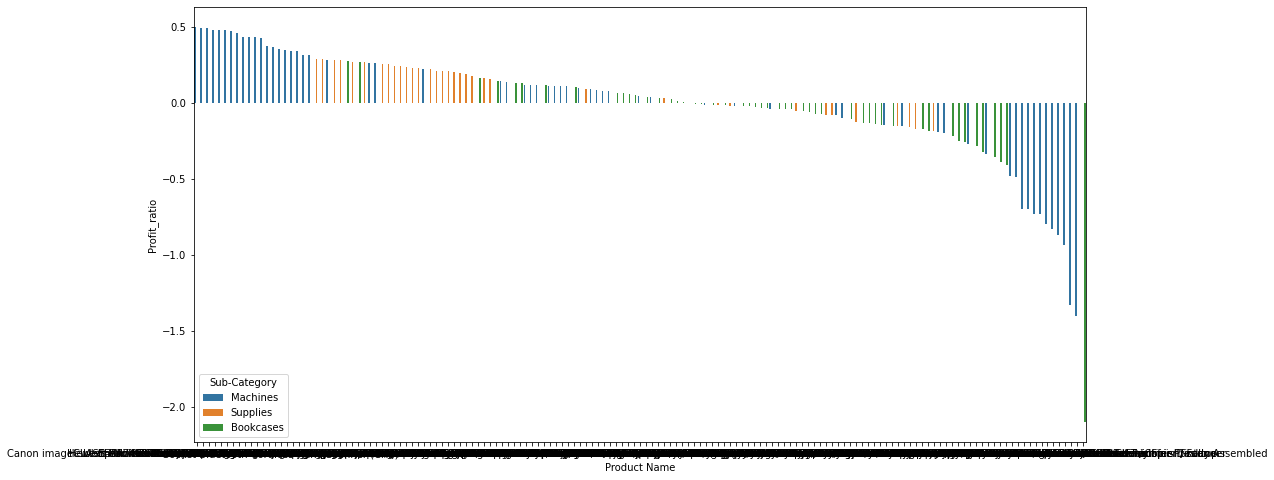

In [16]:
df_unprofitable=df[df['Sub-Category'].isin (['Machines', 'Bookcases', 'Supplies'])]
profit_ratio_by_product=df_unprofitable.groupby(['Product Name','Sub-Category']).agg(Total_profit=('Profit','sum'),Total_sales=('Sales','sum')).reset_index()
profit_ratio_by_product['Profit_ratio']=profit_ratio_by_product['Total_profit']/profit_ratio_by_product['Total_sales']
profit_ratio_by_product=profit_ratio_by_product.sort_values(by='Profit_ratio',ascending=False)
plt.figure( figsize=(16,8))
sb.barplot(data=profit_ratio_by_product,x='Product Name',y='Profit_ratio', hue='Sub-Category',ci=None)

Even though the graph seems to be very complicated we can easily read it. 
Machines is a very diversified sub-category, however most of the product have negative profitability and other products are not profitable enough to increase the performance of this sub-category. The company should abandone the unfprofitable products and increase the popularity of products with high profit ratio. 

Fasteners sub-category is important because the company sell machines and copiers. We can't don any significant changements in the business strategy of this sub-category (the price is already high and it can't be higher than the price of copiers/machines, the discount is low).  

In Supplies sub-category most of the products are profitables. To increase the profitability of the sub-category the company should dicrease the discount and abandone the most unprofitable products.  

Most of the bookcases are unprofitables. If we keep only profitable products, the choice will be very poor and the popularity of the category will drop down. This sub-category should be abandoned.

# Order/Customer analysis

## Data frame creation

In [8]:
dataset=df
dataset.columns = dataset.columns.str.replace(" ", "_")
dataset.columns

Index(['Order_ID', 'Order_Date', 'Order_Year', 'Order_Quarter', 'Ship_Date',
       'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'Country',
       'City', 'State', 'Postal_Code', 'Region', 'Product_ID', 'Category',
       'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Price', 'Profit_ratio_single_sale'],
      dtype='object')

In [87]:
order=dataset.groupby('Order_ID').agg({'Order_Date':lambda x: x.iloc[0],'Customer_ID':lambda x: x.iloc[0],'Segment':lambda x: x.iloc[0],'State':lambda x: x.iloc[0],'Region':lambda x: x.iloc[0],"Category":"nunique","Sub-Category":"nunique","Sales":"sum","Quantity":"mean","Discount":"mean","Profit":"sum"}).reset_index()
order['Profit_Ratio']=order.Profit/order.Sales
order

,Order_ID,Order_Date,Customer_ID,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Ratio
0,CA-2016-100006,2016-09-07,DK-13375,Consumer,New York,East,1,1,377.970,3.000000,0.000000,109.6113,0.290000
1,CA-2016-100090,2016-07-08,EB-13705,Corporate,California,West,2,2,699.192,4.500000,0.200000,-19.0890,-0.027302
2,CA-2016-100293,2016-03-14,NF-18475,Home Office,Florida,South,1,1,91.056,6.000000,0.200000,31.8696,0.350000
3,CA-2016-100328,2016-01-28,JC-15340,Consumer,New York,East,1,1,3.928,1.000000,0.200000,1.3257,0.337500
4,CA-2016-100363,2016-04-08,JM-15655,Corporate,Arizona,West,1,2,21.376,2.500000,0.200000,7.7192,0.361115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,US-2019-168802,2019-11-03,JO-15145,Corporate,Washington,West,1,1,18.368,4.000000,0.200000,5.9696,0.325000
5005,US-2019-169320,2019-07-23,LH-16900,Consumer,Indiana,Central,2,2,171.430,3.500000,0.000000,16.6721,0.097253
5006,US-2019-169488,2019-09-07,AA-10375,Consumer,Rhode Island,East,1,1,56.860,3.500000,0.000000,26.5552,0.467028
5007,US-2019-169502,2019-08-28,MG-17650,Home Office,Wisconsin,Central,1,2,113.410,4.000000,0.000000,32.4527,0.286154


## Order

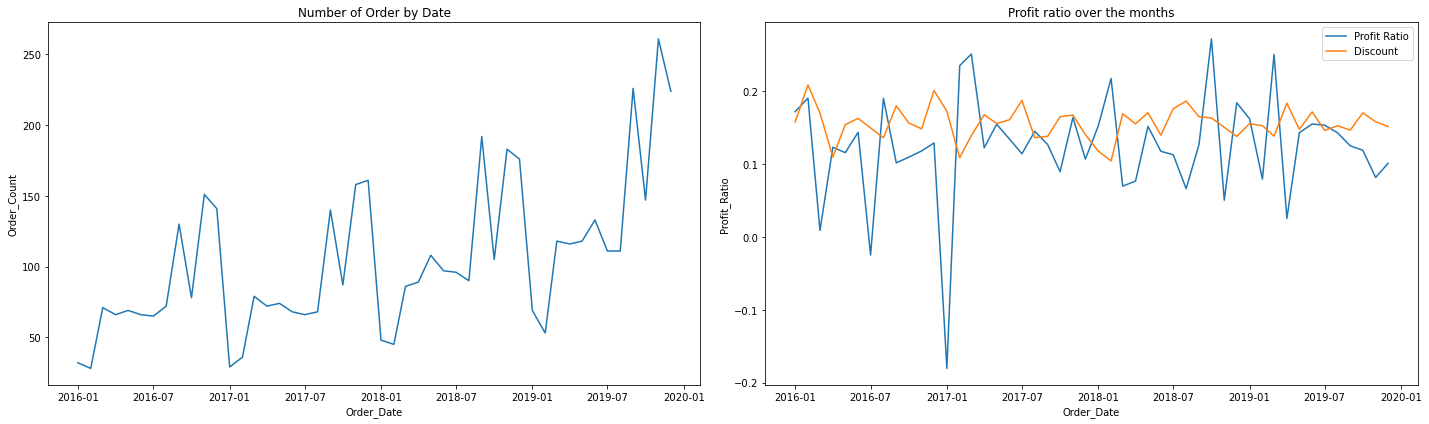

In [88]:
order_seas=order.groupby(order['Order_Date'].dt.strftime('%Y-%m')).agg({'Order_ID':'count','Sales':'sum','Discount':'mean','Profit':'sum'}).reset_index()
order_seas['Profit_Ratio']=order_seas.Profit/order_seas.Sales
order_seas.rename(columns={'Order_ID':'Order_Count'},inplace=True)
order_seas.Order_Date=pd.to_datetime(order_seas.Order_Date,format='%Y-%m')

plt.figure(figsize = (20, 6))
plt.subplot(1,2,1)
chart=sb.lineplot(data=order_seas,x='Order_Date',y='Order_Count')

plt.subplot(1,2,2)
chart1=sb.lineplot(data=order_seas,x='Order_Date',y='Profit_Ratio', label='Profit Ratio')
chart2=sb.lineplot(data=order_seas,x='Order_Date',y='Discount',label='Discount')

chart.set_title("Number of Order by Date")
chart1.set_title('Profit ratio over the months')

plt.tight_layout()
plt.show()

According to the number of orders along the years, there are seasonality and trend. The trend shows that the number of order increases over the years. 
Every year there is a huge amount of orders made in September, November and December. This can correspond to the start of the school (september), to the black friday (November) and Christmas (December). 
If we compare to the Profit Ratio, it has been only three months negative overall, and only the first year.
It seems the Profit Ratio is the higest when the number of orders is not at the maximun, more or less in february/march. Actually when the discount is the lowest, this is when the Profit Ratio is the highest.

## Customer

In [89]:
order['Date_Min']=order.Order_Date
order.rename(columns={'Order_Date':'Date_Max'},inplace=True)

customer=order.groupby("Customer_ID").agg({"Order_ID":"count","Date_Max":"max","Date_Min":"min","Segment":"unique","State":"unique","Region":"unique","Category":"mean","Sub-Category":"mean","Sales":"sum","Quantity":"mean","Discount":"mean","Profit":"sum"}).reset_index()
customer

,Customer_ID,Order_ID,Date_Max,Date_Min,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,AA-10315,5,2019-06-29,2016-03-31,[Consumer],"[California, New York, Texas, Minnesota]","[West, East, Central]",1.400000,2.200000,5563.560,2.500000,0.060000,-362.8825
1,AA-10375,9,2019-12-11,2016-04-21,[Consumer],"[California, Oregon, Tennessee, Nebraska, Ariz...","[West, South, Central, East]",1.333333,1.555556,1056.390,3.074074,0.118519,277.3824
2,AA-10480,4,2019-04-15,2016-05-04,[Consumer],"[Connecticut, Michigan, Missouri, North Carolina]","[East, Central, South]",1.500000,2.250000,1790.512,2.800000,0.050000,435.8274
3,AA-10645,6,2019-11-05,2016-06-22,[Consumer],"[Massachusetts, Pennsylvania, Oklahoma, Kentuc...","[East, Central, South, West]",1.833333,2.666667,5086.935,3.333333,0.061806,857.8033
4,AB-10015,3,2018-11-10,2016-02-18,[Consumer],"[Texas, Washington, Oklahoma]","[Central, West]",1.666667,2.000000,886.156,2.111111,0.088889,129.3465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,11,2019-11-17,2016-01-20,[Consumer],"[Florida, California, Michigan, Illinois, Geor...","[South, West, Central, East]",1.181818,1.909091,2374.658,3.438312,0.060877,621.2300
789,YC-21895,5,2019-12-26,2016-11-17,[Corporate],"[Delaware, California, Texas, Nebraska]","[East, West, Central]",1.400000,1.600000,5454.350,3.600000,0.080000,1305.6290
790,YS-21880,8,2019-12-21,2017-01-12,[Corporate],"[California, Alabama, Delaware, Washington, No...","[West, South, East]",1.375000,1.500000,6720.444,4.604167,0.058333,1778.2923
791,ZC-21910,13,2019-11-06,2016-10-13,[Consumer],"[Illinois, Washington, Colorado, Indiana, Cali...","[Central, West, South, East]",1.769231,2.230769,8025.707,3.435897,0.275000,-1032.1490


In [47]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Customer_ID   793 non-null    object        
 1   Order_ID      793 non-null    int64         
 2   Date_Max      793 non-null    datetime64[ns]
 3   Date_Min      793 non-null    datetime64[ns]
 4   Segment       793 non-null    object        
 5   State         793 non-null    object        
 6   Region        793 non-null    object        
 7   Category      793 non-null    float64       
 8   Sub-Category  793 non-null    float64       
 9   Sales         793 non-null    float64       
 10  Quantity      793 non-null    float64       
 11  Discount      793 non-null    float64       
 12  Profit        793 non-null    float64       
dtypes: datetime64[ns](2), float64(6), int64(1), object(4)
memory usage: 80.7+ KB


### Data enrichement with Last purchase, Loyalty, Frequency

In [90]:
Today=df.Order_Date.max()

customer['Last_Purchase']=Today-customer['Date_Max']

customer['Loyalty']=Today-customer['Date_Min']

customer['Frequency']=(customer.Date_Max-customer.Date_Min)/customer.Order_ID
customer.Frequency= customer.Frequency/np.timedelta64(1, 'D')
customer.Frequency=pd.to_numeric(customer.Frequency, downcast='integer')

customer['Profit_Ratio']=customer.Profit/customer.Sales
customer.Order_ID=customer.rename(columns={'Order_ID':'Order_Count'},inplace=True)
customer.head()

,Customer_ID,Order_Count,Date_Max,Date_Min,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Last_Purchase,Loyalty,Frequency,Profit_Ratio
0,AA-10315,5,2019-06-29,2016-03-31,[Consumer],"[California, New York, Texas, Minnesota]","[West, East, Central]",1.400000,2.200000,5563.560,2.500000,0.060000,-362.8825,184 days,1369 days,237.000000,-0.065225
1,AA-10375,9,2019-12-11,2016-04-21,[Consumer],"[California, Oregon, Tennessee, Nebraska, Ariz...","[West, South, Central, East]",1.333333,1.555556,1056.390,3.074074,0.118519,277.3824,19 days,1348 days,147.666667,0.262576
2,AA-10480,4,2019-04-15,2016-05-04,[Consumer],"[Connecticut, Michigan, Missouri, North Carolina]","[East, Central, South]",1.500000,2.250000,1790.512,2.800000,0.050000,435.8274,259 days,1335 days,269.000000,0.243409
3,AA-10645,6,2019-11-05,2016-06-22,[Consumer],"[Massachusetts, Pennsylvania, Oklahoma, Kentuc...","[East, Central, South, West]",1.833333,2.666667,5086.935,3.333333,0.061806,857.8033,55 days,1286 days,205.166667,0.168629
4,AB-10015,3,2018-11-10,2016-02-18,[Consumer],"[Texas, Washington, Oklahoma]","[Central, West]",1.666667,2.000000,886.156,2.111111,0.088889,129.3465,415 days,1411 days,332.000000,0.145964


In [49]:
customer['Loyalty_year']=customer['Loyalty']/365
#to get it in year, not in days

/Users/cholletemilien/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


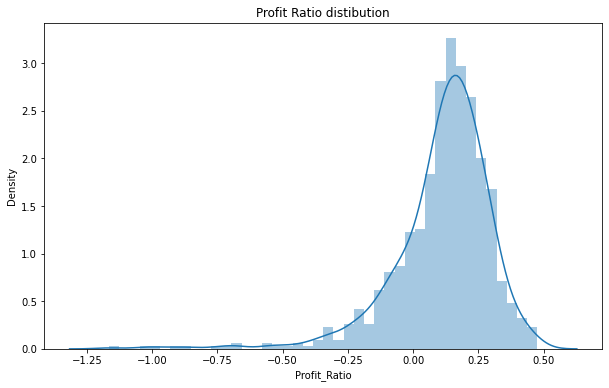

In [51]:
plt.figure(figsize=(10,6))
chart=sb.distplot(customer.Profit_Ratio,hist=True)
chart.set_title("Profit Ratio distibution")
plt.show()

Most of the customers are "profitable" customer but some of them are not. Let's analyse the non profitable customer habits compared to the profitable one.

In [93]:
customer_noprofit=customer[customer.Profit_Ratio<0]

customer_profit=customer[customer.Profit_Ratio>=0]


In [102]:
print('percentage no profitable customers:')
print(len(customer_noprofit)/(len(customer_noprofit)+len(customer_profit)))


percentage no profitable customers:
0.19546027742749053


Almost 20% of the customers are non profitable customers.

/Users/cholletemilien/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-73-b3d3adccacc8>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
/Users/cholletemilien/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

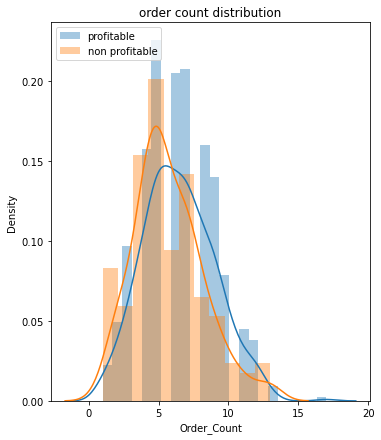

In [73]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
chart=sb.distplot(customer_profit.Order_Count,hist=True,label='profitable')


plt.subplot(1,2,1)
chart1=sb.distplot(customer_noprofit.Order_Count,hist=True,label='non profitable')

plt.legend(loc="upper left")
plt.tight_layout()
plt.title("order count distribution")
plt.show()

The non profitable customers tend to order a bit less (around 5) than the profitable ones (between 5 and 6).


/Users/cholletemilien/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-56-e0c3f75519e2>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
/Users/cholletemilien/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

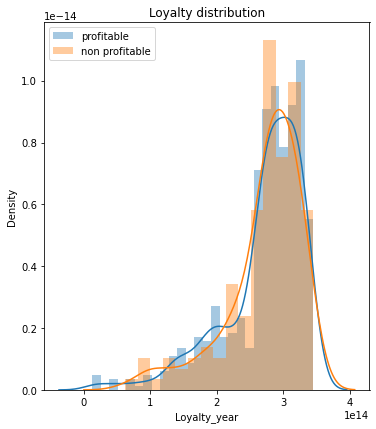

In [56]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
chart=sb.distplot(customer_profit.Loyalty_year,hist=True,label='profitable')


plt.subplot(1,2,1)
chart1=sb.distplot(customer_noprofit.Loyalty_year,hist=True,label='non profitable')

plt.legend(loc="upper left")
plt.tight_layout()
plt.title("Loyalty distribution")

plt.show()

The loyalty, meaning when the cusomers did their first order is really similar. 

/Users/cholletemilien/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-57-ecdd386bc419>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
/Users/cholletemilien/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

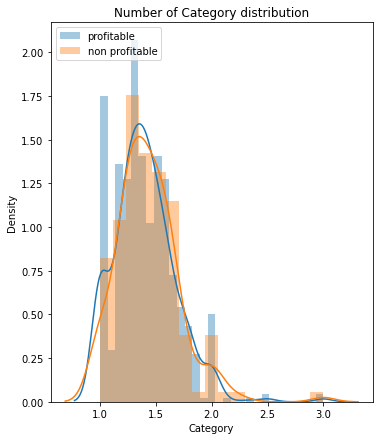

In [57]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
chart=sb.distplot(customer_profit.Category,hist=True,label='profitable')


plt.subplot(1,2,1)
chart1=sb.distplot(customer_noprofit.Category,hist=True,label='non profitable')

plt.legend(loc="upper left")
plt.tight_layout()
plt.title("Number of Category distribution")

plt.show()


In average both type of customers order 1.5 different category of product. 

/Users/cholletemilien/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-94-31fea0334017>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
/Users/cholletemilien/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

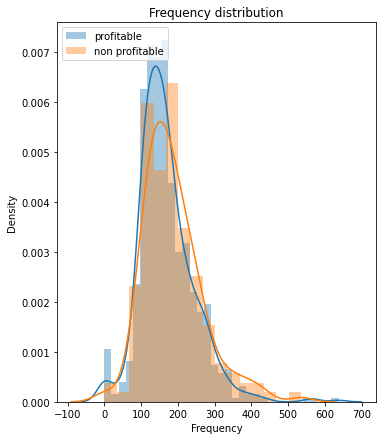

In [94]:

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
chart=sb.distplot(customer_profit.Frequency,hist=True,label='profitable')


plt.subplot(1,2,1)
chart1=sb.distplot(customer_noprofit.Frequency,hist=True,label='non profitable')

plt.legend(loc="upper left")
plt.tight_layout()
plt.title("Frequency distribution")

plt.show()


The frequency represents the average number of days which separate each purchase from one customer.
We can see that the "bell" is more spread with the non profitable customers than the profitable ones eventhough the median is more or less the same (175 days).

/Users/cholletemilien/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-44-df825457d567>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
/Users/cholletemilien/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fig

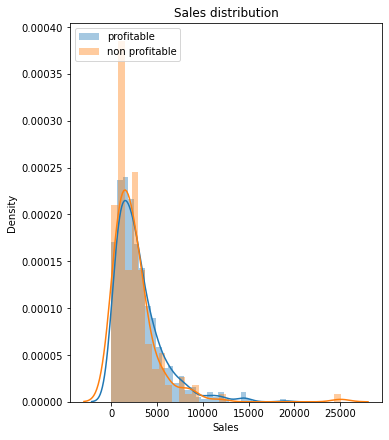

In [44]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
chart=sb.distplot(customer_profit.Sales,hist=True,label='profitable')


plt.subplot(1,2,1)
chart1=sb.distplot(customer_noprofit.Sales,hist=True,label='non profitable')

plt.legend(loc="upper left")
plt.tight_layout()
plt.title("Sales distribution")

plt.show()


The sales distribution is really similar. It does not differenciate the two customer types. 

In [58]:
customer_profit['Segment'] = [''.join(map(str, l)) for l in customer_profit['Segment']]
customer_noprofit['Segment'] = [''.join(map(str, l)) for l in customer_noprofit['Segment']]

<ipython-input-58-efc61afba9fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_profit['Segment'] = [''.join(map(str, l)) for l in customer_profit['Segment']]
<ipython-input-58-efc61afba9fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_noprofit['Segment'] = [''.join(map(str, l)) for l in customer_noprofit['Segment']]


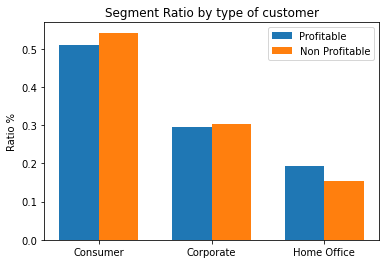

In [95]:
import numpy as np

labels = ['Consumer', 'Corporate', 'Home Office']
customer_profit['Segment'].value_counts(sort=True,normalize=True)
customer_noprofit['Segment'].value_counts(sort=True,normalize=True)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, customer_profit['Segment'].value_counts(sort=True,normalize=True), width, label='Profitable')
rects2 = ax.bar(x + width/2, customer_noprofit['Segment'].value_counts(sort=True,normalize=True), width, label='Non Profitable')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ratio %')
ax.set_title('Segment Ratio by type of customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

The corporate customers are in the same proportion in the non profitable and profitable customers. But in the non profitable customers there are more "consumer" and less "home office" customers. It can have an impact on the profitability because the consumers buy cheaper products. 

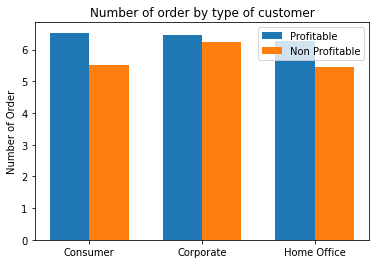

In [67]:
customer_profit_segcount=customer_profit.groupby('Segment').Order_Count.mean().reset_index()
customer_noprofit_segcount=customer_noprofit.groupby('Segment').Order_Count.mean().reset_index()

labels = ['Consumer', 'Corporate', 'Home Office']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, customer_profit_segcount['Order_Count'], width, label='Profitable')
rects2 = ax.bar(x + width/2, customer_noprofit_segcount['Order_Count'], width, label='Non Profitable')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Order')
ax.set_title('Number of order by type of customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()



Moreover in each category of customers, the non profitable customers order less than the profitable ones. That might be a cause of non profitability. 

/Users/cholletemilien/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-280-085f5c00ea04>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
/Users/cholletemilien/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

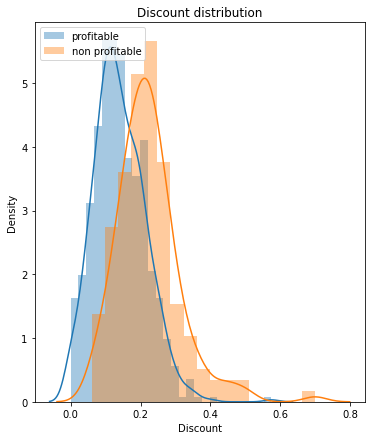

In [280]:

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
chart=sb.distplot(customer_profit.Discount,hist=True,label='profitable')


plt.subplot(1,2,1)
chart1=sb.distplot(customer_noprofit.Discount,hist=True,label='non profitable')

plt.legend(loc="upper left")
plt.tight_layout()
plt.title("Discount distribution")

plt.show()


The main factor that distinguishes the two profiles of customers is the average discount. 
The less profitable customers buy with a hight pourcentage of discount, around 20% discount.
Thoses customers can be considered as opportunists because they buy only products which have a consequent discount. 



### Recommandations after the customer analysis

The customer analysis revealed that 20% of A-to-Z Market's customers are non profitable. Among them there are more customers considered as "Consumer" and less "Home office" customers. Moreover they order with an average discount of 20%.
It corroborates the analysis made earlier. The "Consumer" customers buy especially products from the furniture category. This is the less profitable category of products.


In order to increase the profitability, we recommand to decrease the costs. Decreasing the cost of shipping by increasing the number of unit ordered and at the same time negociate with the providers a discount after a certain amount of unit bought.

To turn non profitable customers into profitable one, we recommand to improve the recommandation engine of the website to propose them profitable products without discount. At the same time it would be worth running an emailing campaign to attrack them with discount as they react positively to it. Doing that will increase their number of order. 

# Conclusion


After deeply analysing the performance of each product category, here are our recommandations:

- Paper is a very popular and cheap product with very high profitability. This sub-category is performing well, but in avarage people buy 3 products by order. Because paper is very cheap and popular product, the company can easily increase the average number of units by order. For example, the company can propose 2+1 and 5+2 discount.

- The popularity of Binders is due to the discount. The company should keep the same commercial stategy for this sub-category because the high discount increases the sales and brings profit.

- The profitability and the popularity of Bookcases are low. To increase the profitability the company needs to increase price (but it is already high) or dicrease the discount (but most of the buyers seem to be motivated by the high discount which is around 20%). Moreover, most of the bookcases are unprofitables. If we keep only profitable products, the choice will be very poor and the popularity of the category will drop down. This sub-category should be abandoned.

- Most of the sales of Copiers are motivated by the discount. This sub-categoty is already very profitable but not enough popular. The average discount is 16%, the company can increase the discount even more to motivate people to buy more copiers. The products will remain profitable and bring more money to the company.

- We said that Chairs are expensive products and have relativly high discount (17%), we can see that most of the sales are motivated by the discount. This category is very important for the company because it brings a lot of money. To get even more money the company needs to increase the profitability of the sub-category by decreasing costs. 

- Tables is the most unprofitable category. Products are expensive and most of the sales are motivated by a high discount (27%). But according to the association rules even though Tables are unprofitable sub-category, they are often bought with other profitable products like Chairs and Labels. It means that the company should keep the same strategy for this sub-category.

- Machines is a very diversified sub-category, however most of the product have negative profitability and other products are not profitable enough to increase the performance of this sub-category. The company should abandone the unfprofitable products and increase the popularity of products with high profit ratio.

In addition to these recommandations for some categories, A-to-Z Market should also focus on their customers and develop different strategies according to their profile. 

- Some customers are more receptive to discount than others and buy only when there is a discount. They can become non profitable customers as the discount reduces a lot the profitability. To turn non profitable customers into profitable one, we recommand to improve the recommandation engine of the website to propose them profitable products without discount. At the same time it would be worth running an emailing campaign to attrack them with discount as they react positively to it. Doing that will increase their number of orders.

In order to increase the profitability, we recommand to decrease the costs. Decreasing the cost of shipping by increasing the number of unit ordered and at the same time negociate with the providers a discount after a certain amount of unit bought.
